In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_titanic = pd.read_excel('titanic3.xls')

In [3]:
df_titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN


In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  home.dest  745 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 133.1+ KB


In [5]:
df_titanic.isna().sum()
df_titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN


In [6]:
df_titanic.drop(["name","sex","ticket","cabin","embarked","boat","home.dest"], axis=1,inplace=True)
df_titanic.head()

,pclass,survived,age,sibsp,parch,fare
0,1,1,29.0000,0,0,211.3375
1,1,1,0.9167,1,2,151.5500
2,1,0,2.0000,1,2,151.5500
3,1,0,30.0000,1,2,151.5500
4,1,0,25.0000,1,2,151.5500


In [7]:
from sklearn.impute import SimpleImputer
df_titanic.replace('NaN',np.NaN,inplace=True)
imp=SimpleImputer(missing_values=np.NaN, strategy='mean')
idf=pd.DataFrame(imp.fit_transform(df_titanic))
idf.columns=df_titanic.columns
idf.index=df_titanic.index

In [10]:
idf['fare'].isna().sum()

0

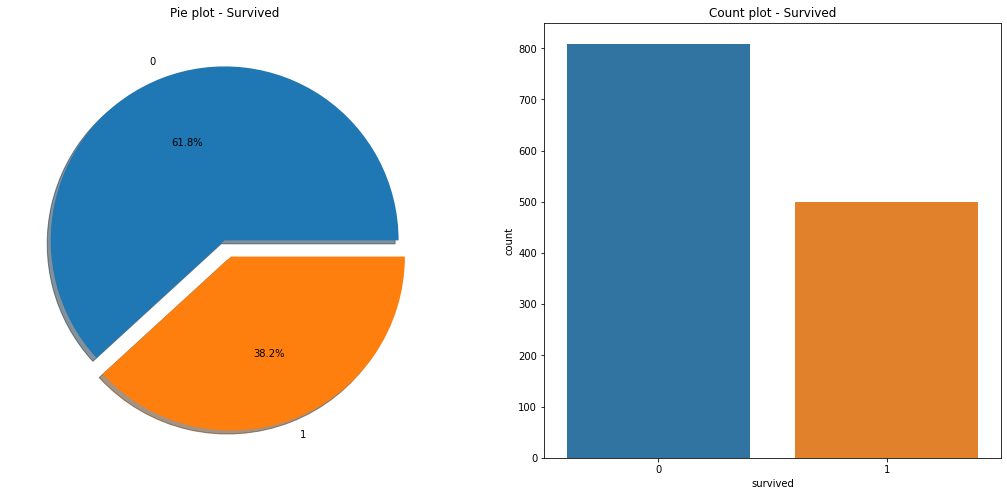

In [60]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df_titanic['survived'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('survived', data=df_titanic, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

BUILD FEATURES AND LABEL

In [11]:
y = idf["survived"].values
X = idf.drop(['survived'], axis = 1)

In [12]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import (f1_score, confusion_matrix) 
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [13]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 3))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() 
lr.fit(X_train,y_train) 
y_pred = lr.predict(X_test) 
lr_acc = lr.score(X_test,y_test)*100 
lr_f1 = f1_score(y_test, y_pred)*100 
print("Accuracy of Logistic Regression： {:.2f}%".format(lr_acc))
print("F1 score of Logistic Regression: {:.2f}%".format(lr_f1))
print('Confusion matrix of Logistic Regression:\n', confusion_matrix(y_test,y_pred))

Accuracy of Logistic Regression： 69.08%
F1 score of Logistic Regression: 53.71%
Confusion matrix of Logistic Regression:
 [[134  28]
 [ 53  47]]


In [15]:
from sklearn.neighbors import KNeighborsClassifier # KNN
k = 5 
knn = KNeighborsClassifier(n_neighbors = k)  
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test) 
knn_acc = knn.score(X_test,y_test)*100 
knn_f1 = f1_score(y_test, y_pred)*100 
print("Accuracy of {}NN: {:.2f}%".format(k, knn_acc))
print("F1 score of {}NN : {:.2f}%".format(k, knn_f1))
print('Confusion matrix of KNN :\n', confusion_matrix(y_test,y_pred))

Accuracy of 5NN: 72.52%
F1 score of 5NN : 60.00%
Confusion matrix of KNN :
 [[136  26]
 [ 46  54]]


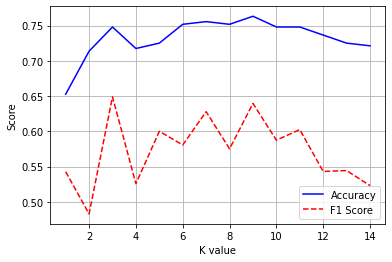

Maximum kNN Score is 64.89%


In [16]:
f1_score_list = []
acc_score_list = []
for i in range(1,15): 
    kNN = KNeighborsClassifier(n_neighbors = i)  
    kNN.fit(X_train, y_train)
    acc_score_list.append(kNN.score(X_test, y_test))
    y_pred = kNN.predict(X_test) 
    f1_score_list.append(f1_score(y_test, y_pred))
index = np.arange(1,15,1)
# plot
plt.plot(index,acc_score_list,c='blue',linestyle='solid')
plt.plot(index,f1_score_list,c='red',linestyle='dashed')
plt.legend(["Accuracy", "F1 Score"])
plt.xlabel("K value")
plt.ylabel("Score")
plt.grid('false')
plt.show()
kNN_acc = max(f1_score_list)*100
print("Maximum kNN Score is {:.2f}%".format(kNN_acc))

In [17]:
from sklearn.svm import SVC # SVM
svm = SVC(random_state = 1) 
svm.fit(X_train, y_train) 
y_pred = svm.predict(X_test) 
svm_acc = svm.score(X_test,y_test)*100 
svm_f1 = f1_score(y_test, y_pred)*100 
print("Accuracy of SVM : {:.2f}%".format(svm_acc))
print("F1 score of SVM : {:.2f}%".format(svm_f1))
print('Confusion matrix of SVM :\n', confusion_matrix(y_test,y_pred))

Accuracy of SVM : 70.99%
F1 score of SVM : 55.29%
Confusion matrix of SVM :
 [[139  23]
 [ 53  47]]


In [18]:
from sklearn.naive_bayes import GaussianNB # naive bayes
nb = GaussianNB() 
nb.fit(X_train, y_train) 
y_pred = nb.predict(X_test) 
nb_acc = nb.score(X_test,y_test)*100 
nb_f1 = f1_score(y_test, y_pred)*100 
print("Accuracy of naive bayes: {:.2f}%".format(nb_acc))
print("F1 score of naive bayes: {:.2f}%".format(nb_f1))
print('Confusion matrix of naive bayes:\n', confusion_matrix(y_test,y_pred))

Accuracy of naive bayes: 65.65%
F1 score of naive bayes: 45.78%
Confusion matrix of naive bayes:
 [[134  28]
 [ 62  38]]


In [19]:
from sklearn.tree import DecisionTreeClassifier # Decision Tree
dt = DecisionTreeClassifier() 
dt.fit(X_train, y_train) 
y_pred = dt.predict(X_test) 
dt_acc = dt.score(X_test,y_test)*100 
dt_f1 = f1_score(y_test, y_pred)*100 
print("Accuracy of Decision Tree: {:.2f}%".format(dt_acc))
print("F1 score of Decision Tree: {:.2f}%".format(dt_f1))
print("Confusion matrix of Decision Tree:\n", confusion_matrix(y_test,y_pred))

Accuracy of Decision Tree: 67.18%
F1 score of Decision Tree: 52.75%
Confusion matrix of Decision Tree:
 [[128  34]
 [ 52  48]]


In [20]:
from sklearn.ensemble import RandomForestClassifier # RandomForest
rf = RandomForestClassifier(n_estimators = 550, random_state = 1) 
rf.fit(X_train, y_train) 
y_pred = rf.predict(X_test) 
rf_acc = rf.score(X_test,y_test)*100 
rf_f1 = f1_score(y_test, y_pred)*100 
print("Accuracy of Random Forest: {:.2f}%".format(rf_acc))
print("F1 score of Random Forest: {:.2f}%".format(rf_f1))
print("Confusion matrix of Random Forest:\n", confusion_matrix( y_test,y_pred))

Accuracy of Random Forest: 72.14%
F1 score of Random Forest: 60.96%
Confusion matrix of Random Forest:
 [[132  30]
 [ 43  57]]


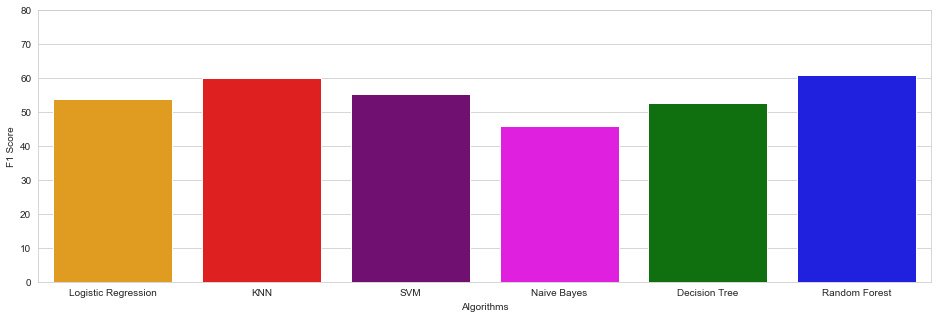

In [21]:
import seaborn as sns
methods = ["Logistic Regression", "KNN", "SVM", 
           "Naive Bayes", "Decision Tree", "Random Forest"]
f1 = [lr_f1, knn_f1, svm_f1, nb_f1, dt_f1, rf_f1]
colors = ["orange","red","purple", "magenta", "green","blue"]
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylim((0,80))
plt.ylabel("F1 Score")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=f1, palette=colors)
# plt.grid(b=None)
plt.show()